In [2]:
# Compare my metacell assignments to my cluster assignments.
# Start with a heatmap?

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def get_seurat_metadata(sample):
    sample = sample.lower()
    file = "../2021-08-29_seurat/"+sample+"_seurat_metadata.tsv"
    df = pd.read_csv(file,sep='\t',index_col=0)
    return df

def get_metacells(sample):
    sample=sample.lower()
    file = sample+"_metacell_ids.tsv"
    df = pd.read_csv(file,sep='\t',index_col=0)
    return df

get_metacells('rcmb56-ht')

,mc@mc
AAACATGCAAATGCCC-1,1
AAACATGCACAACAAA-1,14
AAACCAACATAATCGT-1,13
AAACCGAAGTGCACGC-1,25
AAACCGGCAGTTTGTG-1,8
...,...
TTTGTGTTCCTGCGAA-1,32
TTTGTGTTCCTGGTGA-1,35
TTTGTGTTCGACCTGA-1,37
TTTGTTGGTGATCAGC-1,6


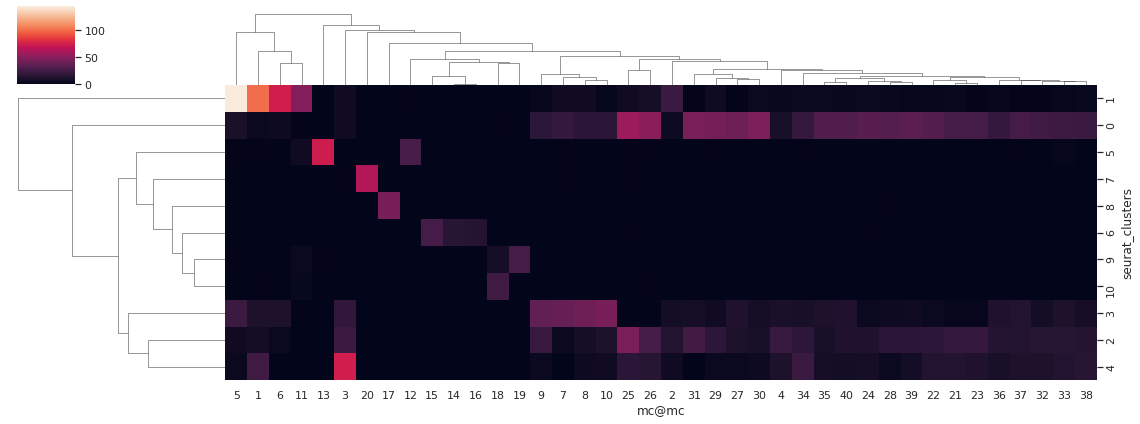

In [47]:
SAMPLE='rcmb56-ht'
metadata = get_seurat_metadata(SAMPLE)
metadata = metadata['seurat_clusters']
metacells = get_metacells(SAMPLE)

df = pd.concat([metacells,metadata],axis=1,join='inner')
groups = df.groupby(['mc@mc','seurat_clusters'])
mat = groups.size() # multiindex series
mat = mat.unstack() # dataframe
mat =mat.fillna(0) # fill NAs
mat
sns.clustermap(mat.transpose(),figsize=(16,6),metric='euclidean')

In [21]:
groups.size()

mc@mc  seurat_clusters
1      0                    4
       1                  100
       2                    7
       3                   11
       4                   24
                         ... 
40     1                    3
       2                   12
       3                   12
       4                    7
       9                    1
Length: 187, dtype: int64

In [11]:
for name, group in groups:
    print(name)
    print(group)

(1, 0)
                    mc@mc  seurat_clusters
CGCCACACACCTCAGG-1      1                0
GACAATACACTTCATC-1      1                0
TCAGCAAGTGATGAAA-1      1                0
TTACCTGTCGGCTAGC-1      1                0
(1, 1)
                    mc@mc  seurat_clusters
AAACATGCAAATGCCC-1      1                1
AAGCTAGAGCGATAGA-1      1                1
AATTCGTCAATATACC-1      1                1
AATTGGACAATCCTGA-1      1                1
ACAGCGCTCGCTCACT-1      1                1
...                   ...              ...
TTGATGTCACCTAATG-1      1                1
TTGCACACATTCCTCG-1      1                1
TTGTCCCAGGATCACT-1      1                1
TTTAAGGTCATGGTGT-1      1                1
TTTCAGTTCTAAGTGC-1      1                1

[100 rows x 2 columns]
(1, 2)
                    mc@mc  seurat_clusters
CAGCTATAGACAAGTG-1      1                2
CCGCAAGGTGCGCAAT-1      1                2
CGAGGTGAGCGCCTTT-1      1                2
CGGAGCAAGGCATTGT-1      1                2
CTAACCCTC

                    mc@mc  seurat_clusters
ACCTTGTGTTGTTGTC-1     11                8
(11, 9)
                    mc@mc  seurat_clusters
AAGGTGCAGTCACCAG-1     11                9
CCCAAACCACCTCAGG-1     11                9
GATCGATTCATCACTT-1     11                9
GCTGCATCAGGAATCG-1     11                9
(11, 10)
                    mc@mc  seurat_clusters
AAGTCTATCCCTCAGT-1     11               10
GAGCTAGCAGGCTAAG-1     11               10
TTTAGCTTCGAAGTAG-1     11               10
(12, 1)
                    mc@mc  seurat_clusters
GAGTAATAGGTCAAAG-1     12                1
(12, 5)
                    mc@mc  seurat_clusters
ACGCACGGTGTTGCTT-1     12                5
ACGCACGGTTACTAGG-1     12                5
AGTGCACGTTGCGGAT-1     12                5
AGTTTGCAGGATAAAC-1     12                5
ATCCATAAGGCTGTCA-1     12                5
ATGTTCAAGGTAGCTT-1     12                5
CAATCGCCAGGCATCT-1     12                5
CCGCAAGGTATTTGGG-1     12                5
CCTTACTCAAGCCACT-1   

TTGTTGTTCCGGTTAG-1     24                0
(24, 1)
                    mc@mc  seurat_clusters
AGCTAAACACCCACAG-1     24                1
CGGTTATAGTTCCTCA-1     24                1
GCAGGATAGCTCCCTG-1     24                1
TTGCAATCATAGCTGC-1     24                1
(24, 2)
                    mc@mc  seurat_clusters
AATATCCCAAGATTCT-1     24                2
CCCGTAAAGGACACTT-1     24                2
GATTCAATCCCTCAAC-1     24                2
GCTAGTGTCGATAACC-1     24                2
GTTAGACTCCCATAAA-1     24                2
TAGCTTAAGGAACCGG-1     24                2
TATAGGTGTTATAGCG-1     24                2
TCGCTAACAGAACCGA-1     24                2
TGAGGAGGTCAAAGGG-1     24                2
TGCTTGCTCGATTTAG-1     24                2
TGTCAGTAGGAGGACT-1     24                2
TTTCGTCCATGGCCCA-1     24                2
(24, 3)
                    mc@mc  seurat_clusters
AGTGCGGAGCTTCCCG-1     24                3
CTCTAAGCATAAGTTC-1     24                3
GGGATTAAGTGTGATC-1     24     

TTTGCATTCGTGCTTC-1     30                0
(30, 1)
                    mc@mc  seurat_clusters
AGTTATGTCAGGGCCT-1     30                1
CTTGTAAAGCTCAATA-1     30                1
TAAGCCAGTTTGTTGC-1     30                1
TACTGACAGTAGCCAT-1     30                1
(30, 2)
                    mc@mc  seurat_clusters
ACCACACCACCTAATG-1     30                2
ATTGCGCCATTTGCTC-1     30                2
CACTAGCCATTTAAGC-1     30                2
CATCACACATCCAGGT-1     30                2
CTAGGACGTCTAACCT-1     30                2
GATTGCAGTGTGTCCC-1     30                2
GTCATTAAGCGCAATT-1     30                2
TGCTCCGTCCCGCATT-1     30                2
TTGGCTGAGAAGGTGC-1     30                2
(30, 3)
                    mc@mc  seurat_clusters
CAATGTCAGGGTCTAT-1     30                3
CCTTTAGTCGAGGTGG-1     30                3
CTCATGACATTGCAGC-1     30                3
CTTTATGGTCGCAATA-1     30                3
GAGGTTAAGCTATGAC-1     30                3
GGTTCCCGTAGACAAA-1     30     

GTTTATCTCATTCATC-1     36                4
(37, 0)
                    mc@mc  seurat_clusters
AAGACATAGCGAAGTA-1     37                0
ACTTGTCGTTTAACCC-1     37                0
AGGCGGATCTGTAAGC-1     37                0
ATCCACCTCATGTTTC-1     37                0
ATTACCGCATCGCTCC-1     37                0
CAACTAATCATGTTTC-1     37                0
CAGCCAATCGAGGTGG-1     37                0
CAGTATGGTTGGCGTG-1     37                0
CCCTGTTAGGATTTGC-1     37                0
CGCATATAGTTCCCAC-1     37                0
CGCTAACCACCTCACC-1     37                0
CGGCTCACATGTCAGC-1     37                0
GACTTGGTCGTGCCTT-1     37                0
GCATGAAAGGAACGCG-1     37                0
GCTCATTGTCCAAATG-1     37                0
GGATGAATCGCTAGCA-1     37                0
GGTACCGGTTAATGAC-1     37                0
TACCGCAAGCCAAATC-1     37                0
TAGGCTTAGTAACGGA-1     37                0
TCCTTTACACTAGCGT-1     37                0
TCTTCAAGTCATCAAG-1     37                0
TGC